# Group Member
 1. Nazmul Hasan Tanmoy  ID: 17-33443-1
 2. Talukder Wasimul Islam  ID:17-33275-1

# Importing necessary libraries

In [1]:
# This part is done by WASIMUL ISLAM TALUKDAR
# To deal with image arrays
import numpy as np
#Data manipulation and analysis for better understanding and visualization
import pandas as pd
# for augmenting the images and loading the images
from keras.preprocessing.image import ImageDataGenerator, load_img
#Changes other type of data to categorical data
from keras.utils import to_categorical
# split the images into test and training
from sklearn.model_selection import train_test_split
# for any graph 
import matplotlib.pyplot as plt
# for any random genration
import random
#To deal with operating system
import os



# Defining Constants

In [9]:
# This part is done by WASIMUL ISLAM TALUKDAR
FAST_RUN = False
# assinging a variable to set image width
IMAGE_WIDTH=128
# assinging a variable to set image width
IMAGE_HEIGHT=128
# list with image width and image height
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
# setting variable for image width
IMAGE_CHANNELS=3

# Preparing Training Data

In [3]:
# This part is done by WASIMUL ISLAM TALUKDAR
# setting the path of training folder
path=r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\train"
# storing iimages in a varibale named filenames
filenames=os.listdir(path)
# intializing a list variable to store cat and dog list of training images
categories=[]
# for loops to deal with each images
for filename in filenames:
    # splitting the filename with . and storing the first index in category 
    category=filename.split('.')[0]
    # cheking whether the category contain the word dog or not
    if category=='dog':
        # if its a dog ,adding 1 into the categories list
        categories.append(1)
    else:
        # if its not dog adding 0 into the categories list
        categories.append(0)
 # loading filenames and categories in a data frame and storing ina  variabnle with the help of panda library       
df=pd.DataFrame({'filename':filenames,'category':categories})

In [4]:
# This part is done by WASIMUL ISLAM TALUKDAR
# printing first 5 value that df contain
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [5]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

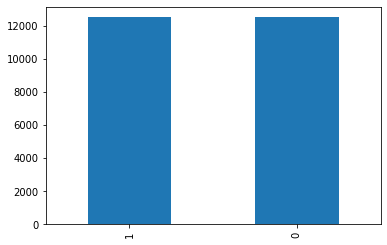

In [6]:
# This part is done by WASIMUL ISLAM TALUKDAR
#printing a plot bar using panda to visualize the two category
df['category'].value_counts().plot.bar()

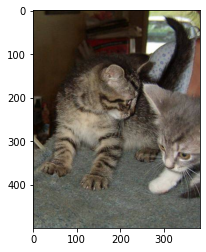

In [7]:
# This part is done by WASIMUL ISLAM TALUKDAR
# This part is basically for testing to see if the image is loading or not
# randomly taking an image filename from filenames using random and storing in sample
sample=random.choice(filenames)
# loading that image from the directory
image=load_img(r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\train/"+sample)
# plotting the image using matplotlib
plt.imshow(image)
# printing the image
plt.show()

# Building CNN Model

In [10]:
#This part is done by NAZMUL HASAN TANMOY
# importing sequential API from keras framework
from keras.models import Sequential
# importing CNN,maxpooling, dropout,flatten, activation,dense, batch normalization to build a CNN model of neural network 
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
# loading the sequential API into model
model = Sequential()

# adding the first layer of CNN with 32 filter and 3*3 filter size,relu activation and setting the shape of image
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# for normalizing the input layers
model.add(BatchNormalization())
# calculate the maximum value of each patch of the feature map with pool size 2*2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# droping neuron from cnn layers to prevent overfitting
model.add(Dropout(0.25))

# adding the first layer of CNN with 64 filter and 3*3 filter size,relu activation and setting the shape of image
model.add(Conv2D(64, (3, 3), activation='relu'))
# for normalizing the input layers
model.add(BatchNormalization())
# calculate the maximum value of each patch of the feature map with pool size 2*2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# droping neuron from cnn layers to prevent overfitting
model.add(Dropout(0.25))

# adding the first layer of CNN with 64 filter and 3*3 filter size,relu activation and setting the shape of image
model.add(Conv2D(128, (3, 3), activation='relu'))
# for normalizing the input layers
model.add(BatchNormalization())
# calculate the maximum value of each patch of the feature map with pool size 2*2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# droping neuron from cnn layers to prevent overfitting
model.add(Dropout(0.25))


#changing the 2d metrics into 1D metrics
model.add(Flatten())
# Adding a hidden layer to the last cnn layer with 512 neuron
model.add(Dense(512, activation='relu')) #hidden layer
# for normalizing the hidden layers
model.add(BatchNormalization())
# droping neuron from cnn layers to prevent overfitting
model.add(Dropout(0.5))
# adding the outpur layer to model with 2 neuron
model.add(Dense(2, activation='softmax')) #output layer
# compile used on pre-built model that specifies loss,optimizer and matrices
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# print out the information about the above model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)       

# Importing Callbacks and Earlystop

In [11]:
#This part is done by NAZMUL HASAN TANMOY
# intializing earlystopping and ReduceLROnPlateau 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

# Learning Rate Reduction

In [12]:
#This part is done by NAZMUL HASAN TANMOY
# to reduce learning rate if the ,metrics stop improving during the build time
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [13]:
#This part is done by NAZMUL HASAN TANMOY
# to monitor the performance measure of the model. It will stop when the argument will be triggered
callbacks=[earlystop,learning_rate_reduction]

# Preparing data for the model

In [14]:
#This part is done by NAZMUL HASAN TANMOY
# changing the category value of 0 to cat and 1 to dog
df["category"]=df["category"].replace({0:'cat',1:'dog'})

In [16]:
#This part is done by NAZMUL HASAN TANMOY
# splitting the images into training and validation
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

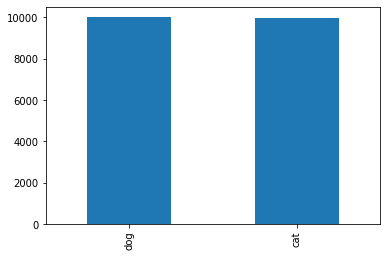

In [18]:
#This part is done by NAZMUL HASAN TANMOY
# printing the trainng data using category plot
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

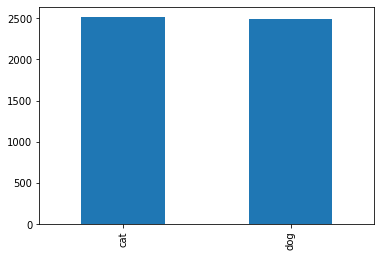

In [20]:
#This part is done by NAZMUL HASAN TANMOY
# printing the validation data using category plot
validate_df['category'].value_counts().plot.bar()

In [23]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Training Generator

In [28]:
#This part is done by NAZMUL HASAN TANMOY
# preparing image data generator for augmenting image and set to a variable
train_datagen = ImageDataGenerator(rotation_range=15,
                                  rescale= 1./255,
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

# setting the training images to train the model
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                   r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\train/",
                                                   x_col='filename',
                                                   y_col='category',
                                                   target_size=IMAGE_SIZE,
                                                   class_mode='categorical',
                                                   batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


# Validation Generator

In [29]:
#This part is done by NAZMUL HASAN TANMOY
# setting the validation images to validate the images for the model
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                             r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\train/",
                                                             x_col='filename',
                                                             y_col='category',
                                                             target_size=IMAGE_SIZE,
                                                             class_model='categorical',
                                                             batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


# Some result of Training Generator

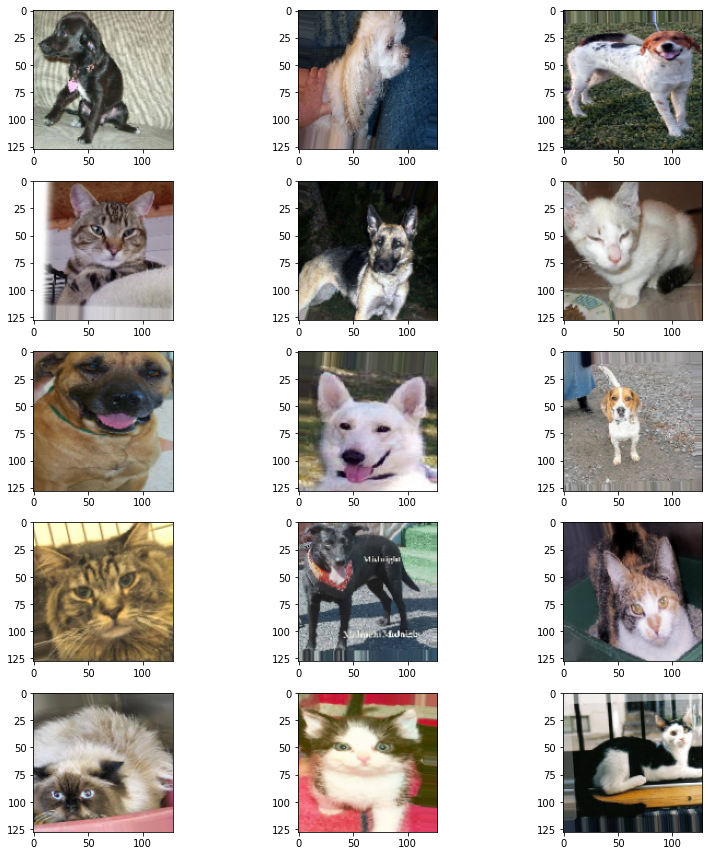

In [34]:
#This part is done by NAZMUL HASAN TANMOY
# testing if the train generator is ok or not to train the model
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3, i+1)
    for x_batch, y_batch in train_generator:
        image=x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fitting the model

In [35]:
#This part is done by NAZMUL HASAN TANMOY
# setting number of times to run the training session
epochs=5
# fitting the training generator into model and train the model with train images
history=model.fit_generator(train_generator,
                           epochs=epochs,
                           validation_data=validation_generator,
                           validation_steps=total_validate//batch_size,
                           steps_per_epoch=total_train//batch_size,
                           callbacks=callbacks)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1333/1333 [==============================] - 897s 672ms/step - loss: 0.9322 - accuracy: 0.5977 - val_loss: 0.7603 - val_accuracy: 0.6266
Epoch 2/5
1333/1333 [==============================] - 840s 630ms/step - loss: 0.5844 - accuracy: 0.7015 - val_loss: 0.5393 - val_accuracy: 0.7415
Epoch 3/5
1333/1333 [==============================] - 853s 640ms/step - loss: 0.5198 - accuracy: 0.7466 - val_loss: 0.4500 - val_accuracy: 0.7912
Epoch 4/5
1333/1333 [==============================] - 852s 639ms/step - loss: 0.4827 - accuracy: 0.7727 - val_loss: 0.4622 - val_accuracy: 0.7872
Epoch 5/5
1333/1333 [==============================] - 908s 681ms/step - loss: 0.4520 - accuracy: 0.7871 - val_loss: 0.4447 - val_accuracy: 0.8160


# Save model

In [37]:
#This part is done by NAZMUL HASAN TANMOY
#saving the model
model.save_weights("model1_catsVsdogs_epoch5.h5")

# Visualizing Training Data

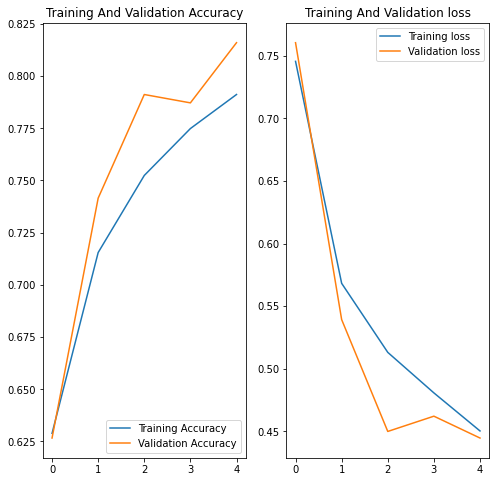

In [42]:
#This part is done by NAZMUL HASAN TANMOY
# visualizing the training data after the training with cnn model to see the training validation accuracy and training and validation loss 
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')



plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training And Validation loss')
plt.show()

# This part is done by NAZMUL HASN TANMOY
From this two graph we can see that Training accuracy is nearly 80% while  Validation accuray is higher than training accuracy which is 82% .That means during the training model was 80% accurate and during the validation accuracy got 2% higher than the training accuracy.

Value loss for the training is more than 45% and for validation loss the percentage is 44%.

S0, Although the accuracy is much higher but the loss is nearly half.

# Preparing Testing Data

In [43]:
# setting the directory of test images
test_path = os.listdir(r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\test1\test1")
test_df = pd.DataFrame({'filename':test_path})

nb_samples = test_df.shape[0]

# Testing Generator

In [47]:
# creating the test genrator to predict the test images
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\test1\test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [48]:
#This part is done by NAZMUL HASAN TANMOY
# loading the predict generator into model using test generator
predict = model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [49]:
# taking the max value of predicted result
test_df['category'] = np.argmax(predict, axis=-1)

In [50]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [51]:
print(category)

dog


In [62]:
test_df.head(180)

,filename,category
0,1.jpg,dog
1,10.jpg,cat
2,100.jpg,dog
3,1000.jpg,dog
4,10000.jpg,dog
...,...,...
175,10155.jpg,dog
176,10156.jpg,cat
177,10157.jpg,dog
178,10158.jpg,cat


# Plotting the result

<AxesSubplot:>

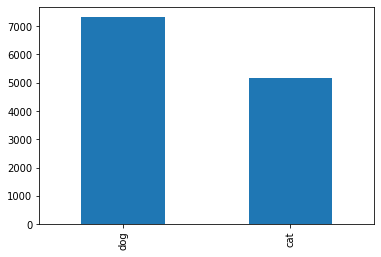

In [53]:
test_df['category'].value_counts().plot.bar()

# Predicted result with Image

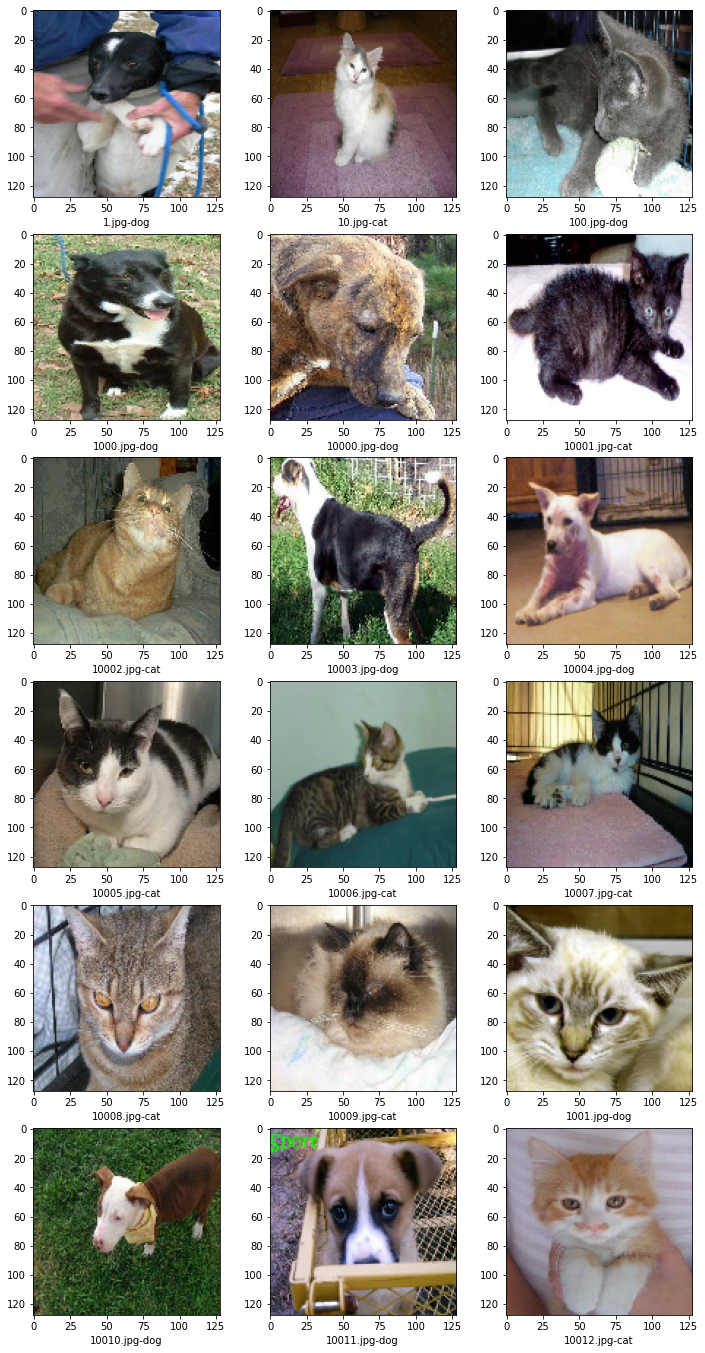

In [66]:
# printing 18 test images with the predict reult
result_test = test_df.head(18)
result_test.head()
plt.figure(figsize=(12,24))

for index, row in result_test.iterrows():
    filename=row['filename']
    category=row ['category']
    img= load_img(r"F:\Fall-2020\Python\PRoject\dogs-vs-cats\test1\test1/"+filename,target_size=IMAGE_SIZE)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '-'+"{}".format(category))
   
plt.show()